In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

First, let's read in our counties shapefiles. This one was obtained from http://www.tngis.org/administrative-boundaries.htm

This creates a geopandas DataFrame, which is like a pandas DataFrame, but has geometry associated with it.

In [2]:
counties = gpd.read_file('county/tn_counties.shp')

In [3]:
counties.head()

,AREA,PERIMETER,TNCODD_,TNCODD_ID,INDEX_NO,COUNTY,STATE,geometry
0,0.128263,1.518444,2,77,59,Stewart,TN,"POLYGON ((1364976.405478028 793944.5740065643,..."
1,0.124217,1.750500,3,81,62,Robertson,TN,"POLYGON ((1641280.781373917 842367.2746404002,..."
2,0.141647,1.975747,4,82,64,Sumner,TN,"POLYGON ((1802978.842360515 837772.8471861221,..."
3,0.141815,1.769964,5,84,60,Montgomery,TN,"POLYGON ((1485935.933511378 842978.4805909351,..."
4,0.079980,1.244972,6,15,71,Macon,TN,"POLYGON ((1908481.094009018 839761.3791088989,..."


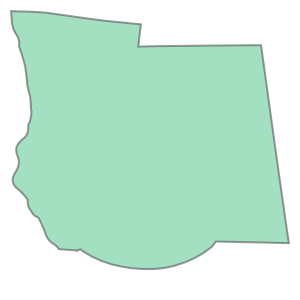

In [3]:
counties.loc[0, 'geometry']

In [4]:
print(counties.loc[0,'geometry'])

POLYGON ((1364976.405478028 793944.5740065643, 1365282.970850857 794336.8252196268, 1365574.561815541 794657.1584339889, 1365969.745316278 795104.5139793663, 1366295.213430941 795436.646973702, 1366741.592931814 795866.2714279103, 1367534.368870626 796558.1550906374, 1368103.458012462 797065.8065150143, 1368376.418035733 797355.9957450045, 1368530.246051596 797526.42846394, 1368696.729639485 797766.0549927043, 1368956.010727153 798153.7747360038, 1369271.678409159 798772.308172122, 1369444.064324812 799188.2368914993, 1369583.513765481 799638.1920669072, 1369698.271711944 800087.2730586361, 1369742.66975988 800280.8283795521, 1369810.984815005 800761.438253562, 1369854.758486497 801032.7988352323, 1369857.055451828 801250.8464426021, 1369871.845501753 801638.1095060806, 1369860.272919961 801943.9620707462, 1369849.278912519 802277.5855871834, 1369819.25481096 802558.8179462097, 1369823.258185481 802858.7899476081, 1369877.61407893 803207.7229221131, 1369929.020328733 803415.0245943893,

If we call `.plot()` and a GeoDataFrame, it will render a plot using the geometry column.

ImportError: The descartes package is required for plotting polygons in geopandas.

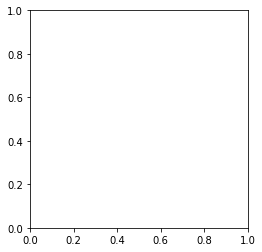

In [5]:
counties.plot();

If we want a larger plot, we can use `plt.subplots()` and set a figsize. When we create our plot, we need to specify that we want it to render on the axes we just created.

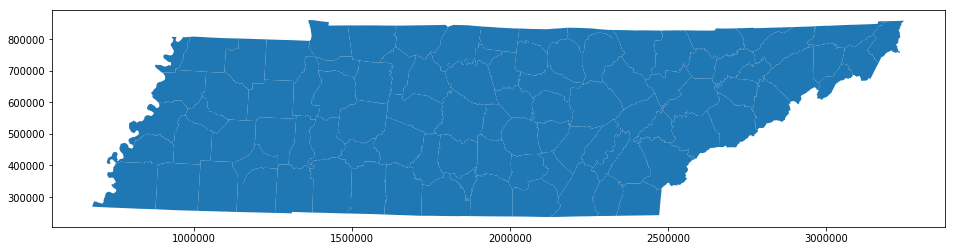

In [7]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax);

Since the axes are not conveying useful information, we can remove them.

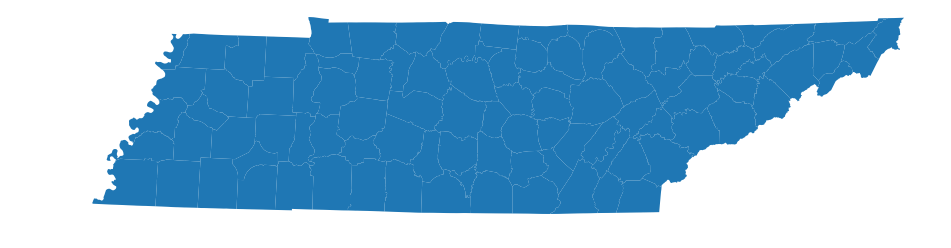

In [8]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax)
ax.axis('off');

In [9]:
unemployment = pd.read_csv('data/unemployment.csv')

unemployment.head()

,COUNTY,STATE,periodName,year,unemployment_rate
0,Anderson,TN,December,2018,3.2
1,Bedford,TN,December,2018,3.2
2,Benton,TN,December,2018,3.8
3,Bledsoe,TN,December,2018,5.4
4,Blount,TN,December,2018,2.8


Now, we can merge the two together. If we put the GeoDataFrame on the left, the result will be a GeoDataFrame.

In [10]:
#counties takes the type of type on left, if unemployment was on left, counties would be df
counties = pd.merge(left = counties, right = unemployment)
counties.head()

,AREA,PERIMETER,TNCODD_,TNCODD_ID,INDEX_NO,COUNTY,STATE,geometry,periodName,year,unemployment_rate
0,0.128263,1.518444,2,77,59,Stewart,TN,"POLYGON ((1364976.405478028 793944.5740065643,...",December,2018,2.9
1,0.124217,1.750500,3,81,62,Robertson,TN,"POLYGON ((1641280.781373917 842367.2746404002,...",December,2018,3.3
2,0.141647,1.975747,4,82,64,Sumner,TN,"POLYGON ((1802978.842360515 837772.8471861221,...",December,2018,2.7
3,0.141815,1.769964,5,84,60,Montgomery,TN,"POLYGON ((1485935.933511378 842978.4805909351,...",December,2018,3.9
4,0.079980,1.244972,6,15,71,Macon,TN,"POLYGON ((1908481.094009018 839761.3791088989,...",December,2018,2.9


To color our map based on a column, we can use the `column` argument.

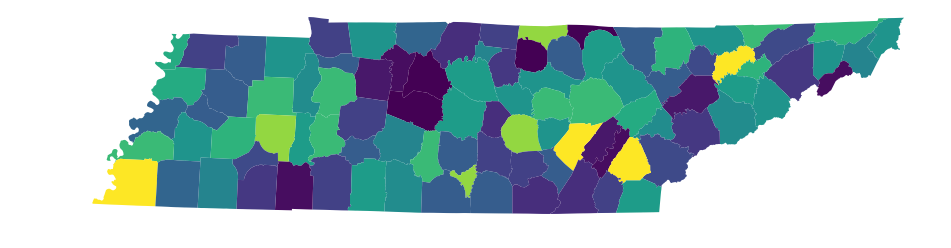

In [11]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              ax = ax)
ax.axis('off');

The default colormap is not great. We can change it by specifying the `cmap` argument. A list of named colormaps is available at https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html.

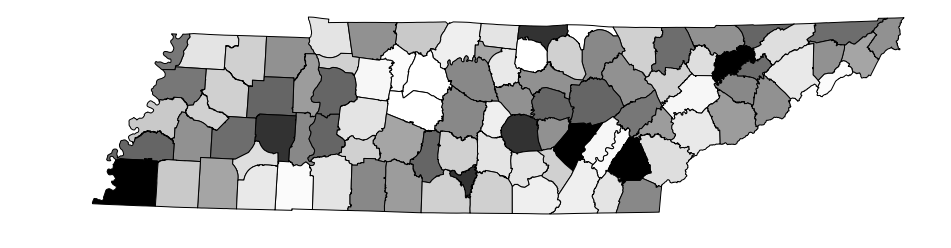

In [12]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              cmap = 'Greys', 
              edgecolor = 'black', 
              ax = ax)
ax.axis('off');

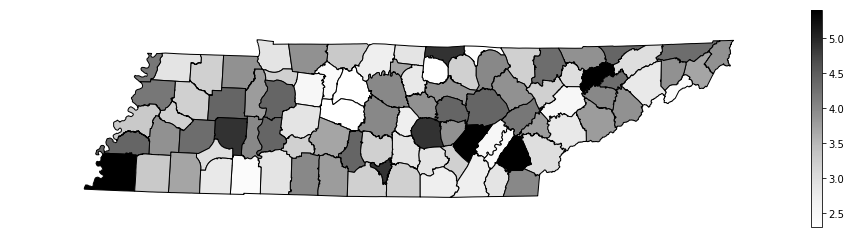

In [13]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              cmap = 'Greys', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
ax.axis('off');

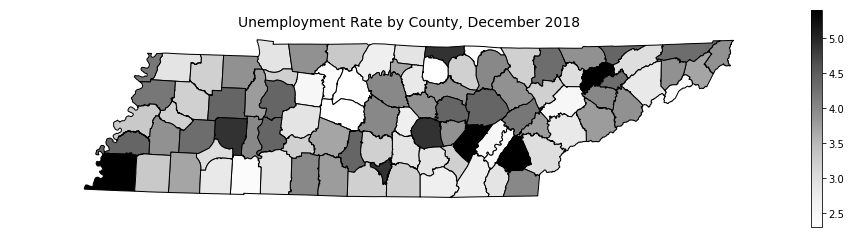

In [14]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              cmap = 'Greys', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Unemployment Rate by County, December 2018', fontsize = 14)
ax.axis('off');